# Credit scoring Model

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
raw_data = pd.read_csv("credit_card_default_analysis.csv")

In [3]:
raw_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Let's separate our dataset into two samples: w/ goods (default = 0) and bads (default = 1)

In [6]:
good_clients = raw_data[raw_data.default == 0]
bad_clients = raw_data[raw_data.default == 1]

In [11]:
good_clients.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0


In [16]:
bad_clients.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,0,0,0,0,...,0,632,316,316,316,0,632,316,0,1


In [20]:
good_clients.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

Let's define two functions to draw the graphs. 
The 1st one (draw_dist_plot) will reflect distribution among good_clients and bad_clients according to their Probability of Default(PD).
The 2nd one will reflect dependency btw the variable and our event(default) on the whole dataset

In [25]:
def draw_dist_plot(pos, neg, bins = 15):
    pylab.figure(figsize = (12, 4))

    pylab.subplot(1, 2, 1) # one row, two columns, first plot
    pylab.grid() # True
    pylab.hist(pos, bins = bins, color = 'r')
    pylab.xlabel('Goods')

    pylab.subplot(1, 2, 2) # one row, two columns, 2nd plot
    pylab.grid()
    pylab.hist(neg, bins = bins, color = 'b')
    pylab.xlabel('Bads')

    pylab.show()

In [26]:
def draw_dependency_to_default_plot(var):
    pylab.figure(figsize = (15, 2))

    pylab.scatter(var, raw_data['default'])
    pylab.grid()

    pylab.show()

## LIMIT_BAL variable

From the graphs we can see that distribution differs. Huge part of non-rturned loans is in [0;100 000]. Most of returned loans are concentrated in [100 000; 300 000] pool. 

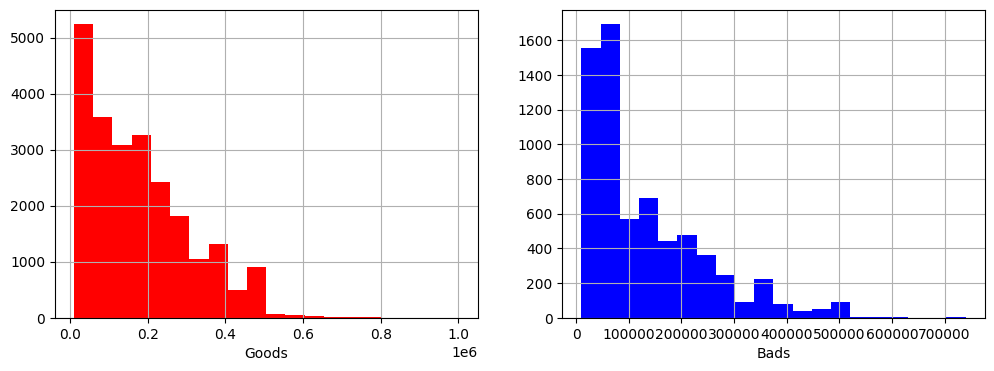

In [35]:
draw_dist_plot(good_clients['LIMIT_BAL'], bad_clients['LIMIT_BAL'], 20)

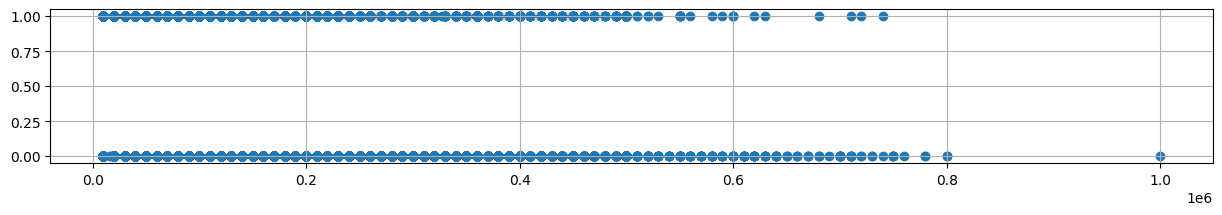

In [36]:
draw_dependency_to_default_plot(raw_data['LIMIT_BAL'])

From graphs we notice: our distribution is not normal. So we can't use parametric criteria. Mann-Whitney rank test could be an option. 

The hypothesis (H0) - the samples came from identical distributions; 
H1 - H0 is not the case.
alpha = 0.05



In [37]:
stats.mannwhitneyu(good_clients['LIMIT_BAL'], bad_clients['LIMIT_BAL'])

MannwhitneyuResult(statistic=95786286.5, pvalue=1.2255485818223303e-189)

The hypothesis H0 is rejected with a very small value of the significance level (pvalue=1.2255485818223303e-189).

We can make an assumption that the size of the credit limit is significant in our credit scoring task.